# This is Bank Marketing Dataset in which we are predicting if has the Client Subscribed a term Deposit using Logistic Regression and Decision Tree

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# 2) Loading of dataset into Pandas DataFrame

In [2]:
data = pd.read_csv('bank-additional-full.csv',sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df = pd.DataFrame(data)

In [5]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 3) Preprocessing of Dataset

In [7]:
labelencoder = LabelEncoder()

In [8]:
jobs = labelencoder.fit_transform(df['job'])
maritals = labelencoder.fit_transform(df['marital'])
educations = labelencoder.fit_transform(df['education'])
defaults = labelencoder.fit_transform(df['default'])
housings = labelencoder.fit_transform(df['housing'])
loans = labelencoder.fit_transform(df['loan'])
contacts = labelencoder.fit_transform(df['contact'])
months = labelencoder.fit_transform(df['month'])
day_of_weeks = labelencoder.fit_transform(df['day_of_week'])
poutcomes = labelencoder.fit_transform(df['poutcome'])
ys = labelencoder.fit_transform(df['y'])

In [9]:
df['job'] = jobs
df['marital'] = maritals
df['education'] = educations
df['default'] = defaults
df['housing'] = housings
df['loan'] = loans
df['contact'] = contacts
df['month'] = months
df['day_of_week'] = day_of_weeks
df['poutcome'] =poutcomes
df['y'] = ys

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 4) Data Visualization using Seaborn and MatplotLib

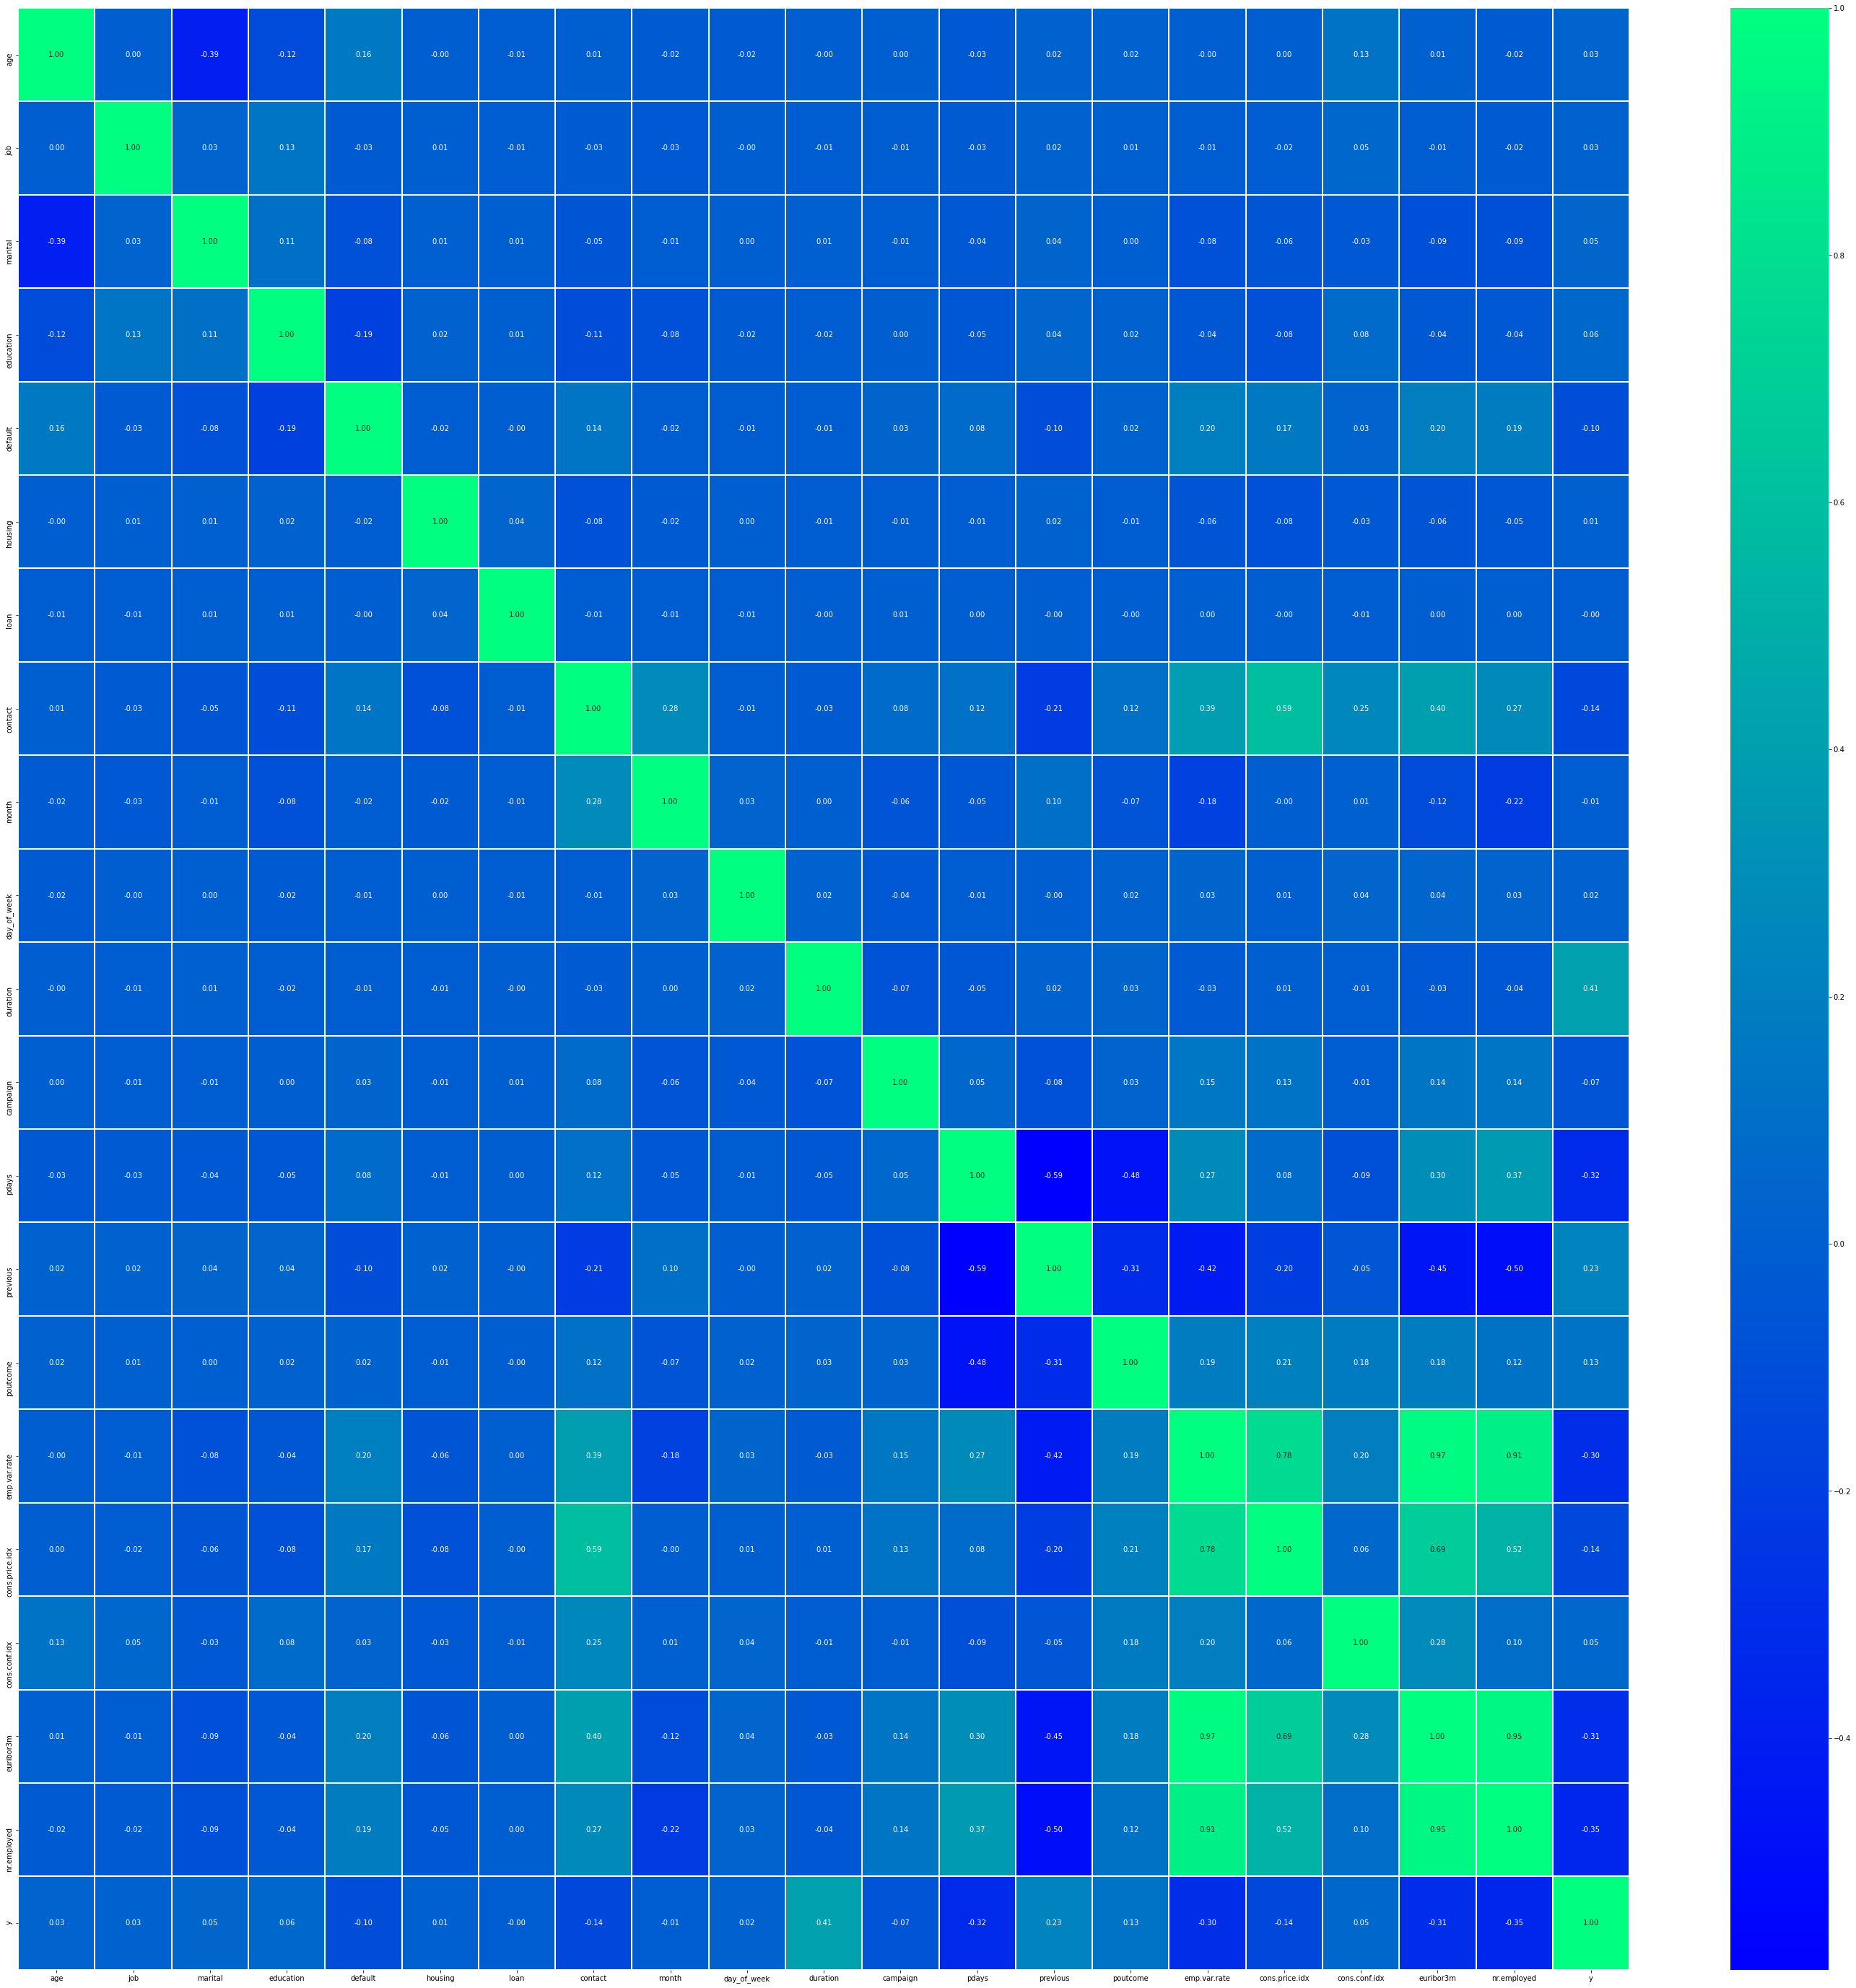

In [12]:
f,ax = plt.subplots(figsize = (50,50))
sns.heatmap(df.corr(), annot = True,  cmap = 'winter',  linewidths =1, fmt = '.2f', ax = ax)
plt.show()

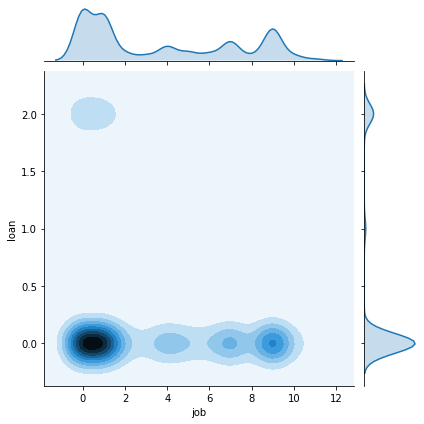

In [13]:
sns.jointplot(x='job',y='loan',data=df,kind='kde')

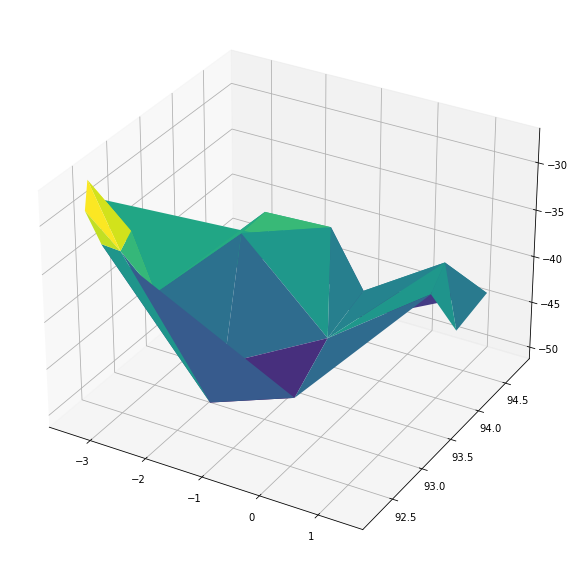

In [14]:
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['emp.var.rate'], df['cons.price.idx'], df['cons.conf.idx'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['emp.var.rate'], df['cons.price.idx'], df['cons.conf.idx'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()

# Other palette
ax.plot_trisurf(df['emp.var.rate'], df['cons.price.idx'], df['cons.conf.idx'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

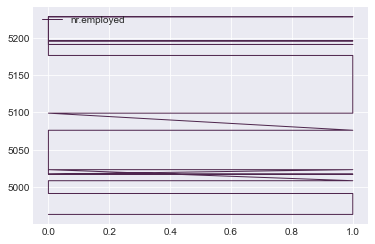

In [15]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('twilight_shifted_r')
 
# multiple line plot
num=0
for column in df.drop(['y'], axis=1):
    num+=1
plt.plot(df['y'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)


# 5) Model Defining using Logistic Regression and Decision Tree

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
# data.drop(['euribor3m','cons.conf.idx','cons.price.idx','emp.var.rate','day_of_week','contact'],axis = 1,inplace=True)

In [18]:
X =df.drop(['y'],axis=1)
y =df[['y']].values

In [19]:
logi = LogisticRegression()
tree = DecisionTreeClassifier()

# 6) Spliting data into input and label/output/target

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=15)

In [21]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39170,36,4,1,6,0,0,0,0,5,2,148,1,999,2,0,-1.8,93.369,-34.8,0.654,5008.7
12009,30,0,1,3,0,1,1,1,4,2,344,1,999,0,1,1.4,94.465,-41.8,4.955,5228.1
31542,35,0,2,3,0,2,0,0,6,2,187,1,999,0,1,-1.8,92.893,-46.2,1.327,5099.1
25270,35,6,0,6,0,0,0,0,7,3,271,3,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
25450,32,1,2,3,0,2,2,0,7,4,126,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,44,9,1,6,0,0,0,0,6,1,30,5,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
39296,66,5,1,3,0,0,0,0,5,3,618,1,999,0,1,-1.8,93.369,-34.8,0.646,5008.7
2693,58,3,1,6,1,0,0,1,6,4,162,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0
8076,32,2,2,5,0,0,0,1,4,1,20,20,999,0,1,1.4,94.465,-41.8,4.865,5228.1


In [22]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [23]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32301,35,0,1,6,0,2,0,0,6,0,763,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
14796,45,4,1,3,1,0,0,0,3,4,94,3,999,0,1,1.4,93.918,-42.7,4.957,5228.1
33819,39,1,0,1,1,2,0,0,6,4,408,1,999,0,1,-1.8,92.893,-46.2,1.281,5099.1
15236,41,9,1,5,0,2,0,0,3,2,410,3,999,0,1,1.4,93.918,-42.7,4.958,5228.1
26854,31,1,2,2,0,2,0,0,7,2,135,2,999,0,1,-0.1,93.200,-42.0,4.076,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,47,1,1,5,1,0,2,1,6,2,964,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
28039,28,9,2,5,0,0,0,0,0,2,444,1,999,0,1,-1.8,93.075,-47.1,1.483,5099.1
21980,34,9,2,6,0,2,0,0,1,4,82,1,999,0,1,1.4,93.444,-36.1,4.964,5228.1
32396,33,1,1,2,0,2,0,0,6,0,264,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1


In [24]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
logi.fit(X_train,y_train)

C:\Program Files\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# 7) Final Prediction of Model for Logistic Regression

In [26]:
predictlogi = logi.predict(X_test)
predictlogi

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
scorelogi = accuracy_score(y_test,predictlogi)
scorelogi*100

90.65307113377034

Text(0.5, 19.5, 'Predicted label')

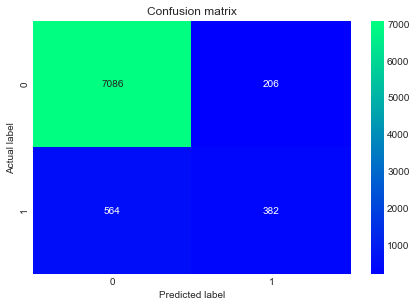

In [28]:
cm = confusion_matrix(y_test, predictlogi)
sns.heatmap(cm, annot=True, cmap="winter" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 8) Final Prediction of Model for Decision Tree

In [29]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
predicttree = tree.predict(X_test)
predicttree

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
socretree = accuracy_score(y_test,predicttree)
socretree*100

88.65015780529255

Text(0.5, 19.5, 'Predicted label')

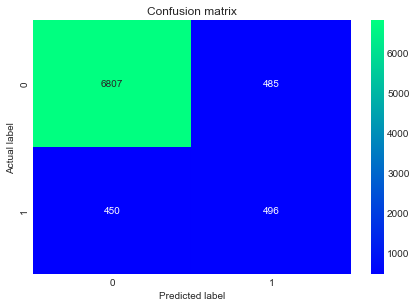

In [32]:
cm = confusion_matrix(y_test, predicttree)
sns.heatmap(cm, annot=True, cmap="winter" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')